In [38]:
import os
from datetime import datetime, timedelta
from enum import Enum
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from test_case_utils import WeatherParams, TestCase, TargetCases, MlflowConfig, get_artifact_path

In [39]:
MlflowConfig.train_run_ids

{'rain_only': 'e94dd1a35e984d618310a2b9cbbb5602',
 'rain_temp_humid': '2e2c64a1723b462d9ec0f8ad37e3ce03',
 'rain_winds': '2924c119f2f649bfa724fa937a65bfb0',
 'all': 'a06a7107eecf4d6e851ab27653d5d7e7'}

In [40]:
train_metrics = pd.DataFrame()
for key, run_id in MlflowConfig.train_run_ids.items():
    train_metrics_file = os.path.join(get_artifact_path(run_id), run_id, 'artifacts', 'training_metrics.csv')
    df = pd.read_csv(train_metrics_file)
    df.rename(columns={'Unnamed: 0': 'x'}, inplace=True)
    # for col in ['train_loss', 'valid_loss', 'valid_acc']:
    #     df[col] = df[col].apply(np.log)
    df['hue'] = key
    train_metrics = pd.concat([train_metrics, df], axis=0)

In [41]:
train_metrics.head()

,x,train_loss,valid_loss,valid_acc,hue
0,0,0.064038,0.072278,0.040680,rain_only
1,1,0.059236,0.075387,0.049438,rain_only
2,2,0.059105,0.070508,0.034594,rain_only
3,3,0.058964,0.073636,0.041208,rain_only
4,4,0.058796,0.072214,0.033485,rain_only


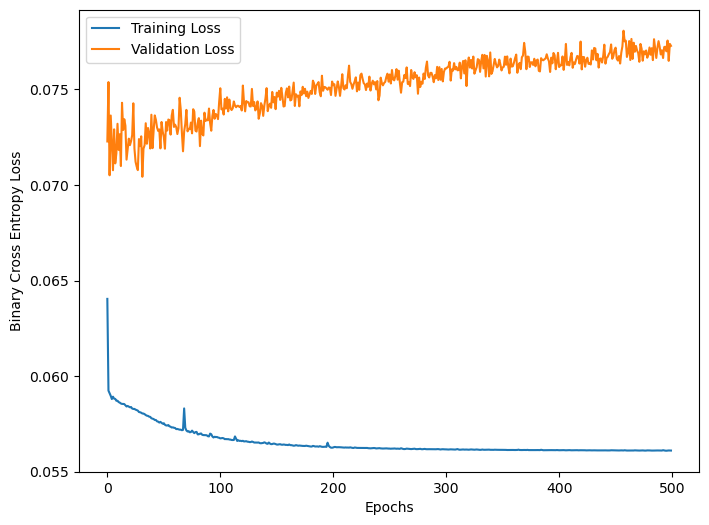

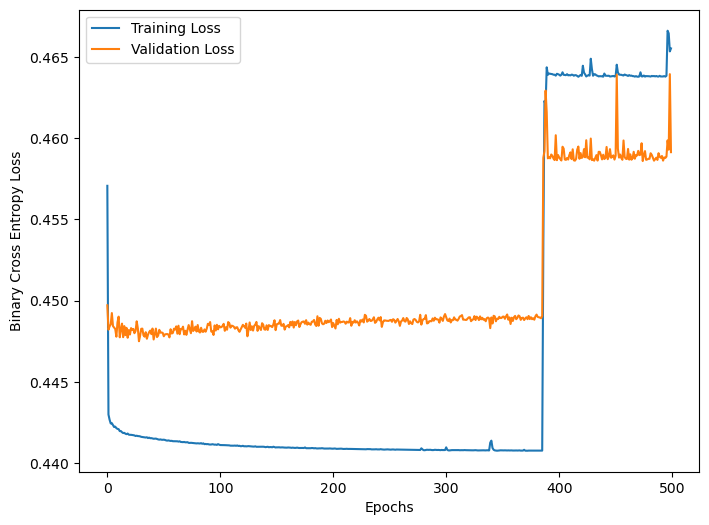

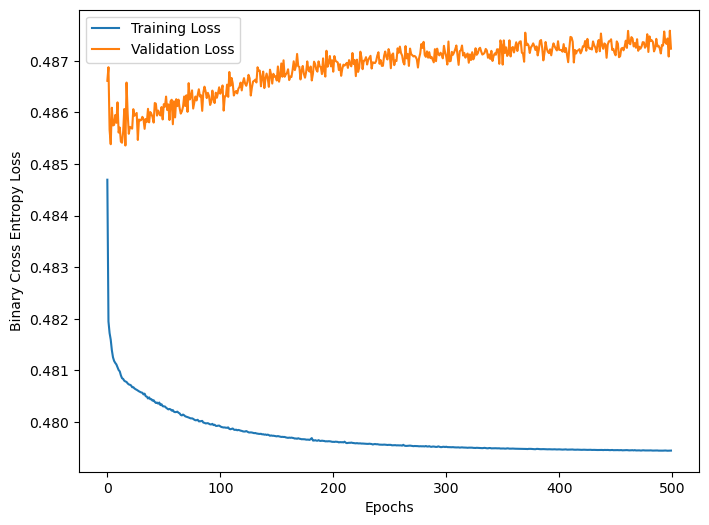

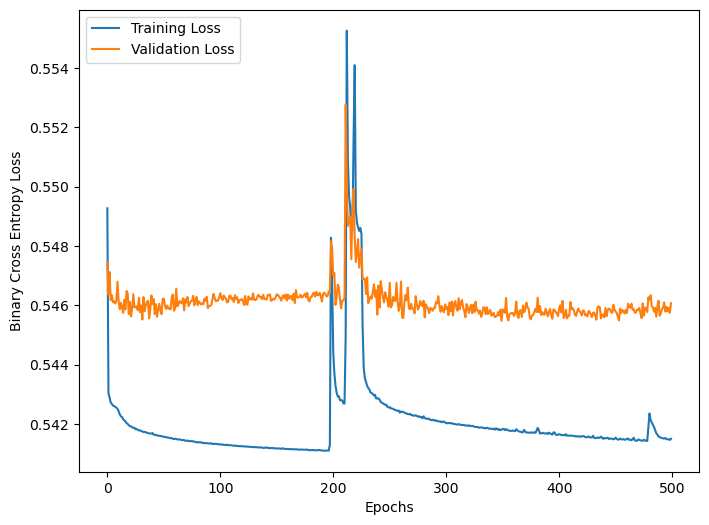

In [51]:
# Training loss
for key in MlflowConfig.train_run_ids.keys():
    fig, ax = plt.subplots(figsize=(8, 6))
    training_losses = train_metrics.loc[train_metrics.hue == key]
    sns.lineplot(data=training_losses, x='x', y='train_loss', ax=ax)
    sns.lineplot(data=training_losses, x='x', y='valid_loss', ax=ax)
    ax.legend(['Training Loss', 'Validation Loss'], loc='upper left')
    ax.set_ylabel('Binary Cross Entropy Loss')
    ax.set_xlabel('Epochs')
    fig.savefig(f'{key}-learning-curve.png')
    plt.show()
    plt.close()